# Avaliação Comparativa do Chatbot LAI

Este notebook compara os resultados de avaliação entre a versão completa (BERT + FAISS) e a versão otimizada (TF-IDF + sklearn) do chatbot LAI.


In [39]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para gráficos
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12


## 1. Carregar Resultados das Avaliações


In [40]:
# Carregar métricas da versão completa (BERT + FAISS)
with open('../data/metrics/metricas_versao_completa.json', 'r') as f:
    metricas_completa = json.load(f)

# Carregar métricas da versão otimizada (TF-IDF + sklearn)
with open('../data/metrics/metricas_versao_otimizada.json', 'r') as f:
    metricas_otimizada = json.load(f)

# Exibir informações básicas
print("=== Versão Completa (BERT + FAISS) ===")
print(f"Precision@5: {metricas_completa['precision_at_5']:.3f}")
print(f"Recall@10: {metricas_completa['recall_at_10']:.3f}")
print(f"F1-Score: {metricas_completa['f1_score']:.3f}")
print(f"Tempo médio de resposta: {metricas_completa['tempo_resposta_medio']:.3f}s")

print("\n=== Versão Otimizada (TF-IDF + sklearn) ===")
print(f"Precision@5: {metricas_otimizada['precision_at_5']:.3f}")
print(f"Recall@10: {metricas_otimizada['recall_at_10']:.3f}")
print(f"F1-Score: {metricas_otimizada['f1_score']:.3f}")
print(f"Tempo médio de resposta: {metricas_otimizada['tempo_resposta_medio']:.3f}s")


=== Versão Completa (BERT + FAISS) ===
Precision@5: 0.090
Recall@10: 0.398
F1-Score: 0.121
Tempo médio de resposta: 0.045s

=== Versão Otimizada (TF-IDF + sklearn) ===
Precision@5: 0.180
Recall@10: 0.517
F1-Score: 0.254
Tempo médio de resposta: 0.005s


## 2. Comparação de Métricas Principais


In [41]:
# Criar DataFrame para comparação
metricas_comparativas = pd.DataFrame({
    'Métrica': ['Precision@5', 'Recall@10', 'F1-Score', 'Tempo de Resposta (s)'],
    'BERT + FAISS': [
        metricas_completa['precision_at_5'], 
        metricas_completa['recall_at_10'], 
        metricas_completa['f1_score'], 
        metricas_completa['tempo_resposta_medio']
    ],
    'TF-IDF + sklearn': [
        metricas_otimizada['precision_at_5'], 
        metricas_otimizada['recall_at_10'], 
        metricas_otimizada['f1_score'], 
        metricas_otimizada['tempo_resposta_medio']
    ]
})

# Visualizar tabela comparativa
metricas_comparativas


,Métrica,BERT + FAISS,TF-IDF + sklearn
0,Precision@5,0.090000,0.180000
1,Recall@10,0.397500,0.516667
2,F1-Score,0.120836,0.253602
3,Tempo de Resposta (s),0.044987,0.005352


<Figure size 1400x800 with 0 Axes>

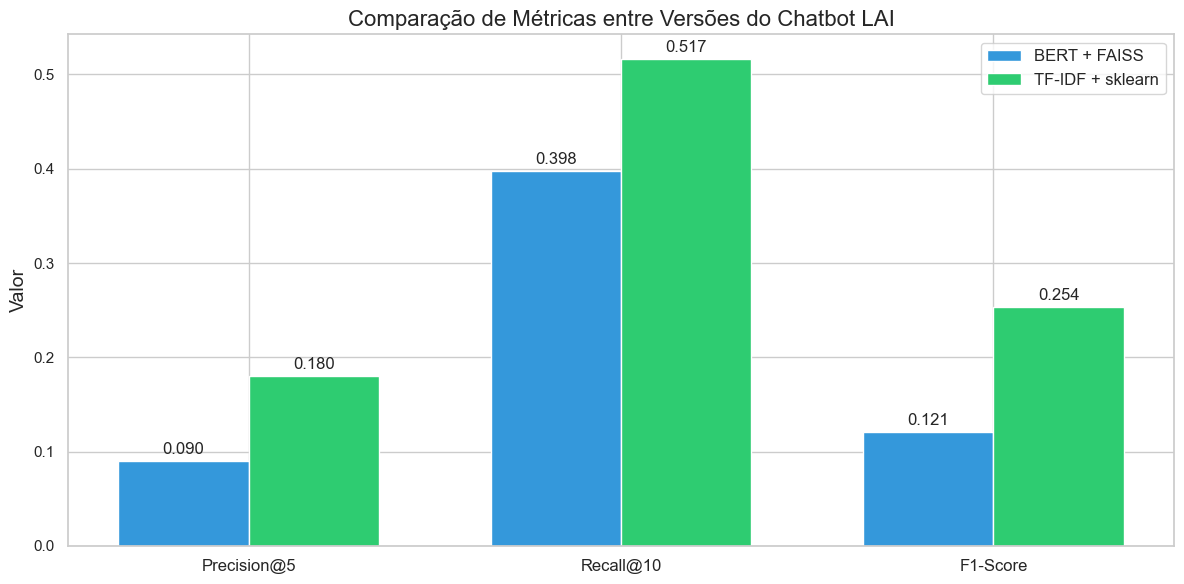

In [42]:
# Gráfico de barras para comparação de métricas
plt.figure(figsize=(14, 8))

# Preparar dados para visualização
metricas = metricas_comparativas['Métrica'].tolist()[:3]  # Excluir tempo de resposta
valores_completa = metricas_comparativas['BERT + FAISS'].tolist()[:3]
valores_otimizada = metricas_comparativas['TF-IDF + sklearn'].tolist()[:3]

x = np.arange(len(metricas))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, valores_completa, width, label='BERT + FAISS', color='#3498db')
rects2 = ax.bar(x + width/2, valores_otimizada, width, label='TF-IDF + sklearn', color='#2ecc71')

# Adicionar rótulos e título
ax.set_title('Comparação de Métricas entre Versões do Chatbot LAI', fontsize=16)
ax.set_ylabel('Valor', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metricas, fontsize=12)
ax.legend(fontsize=12)

# Adicionar valores nas barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


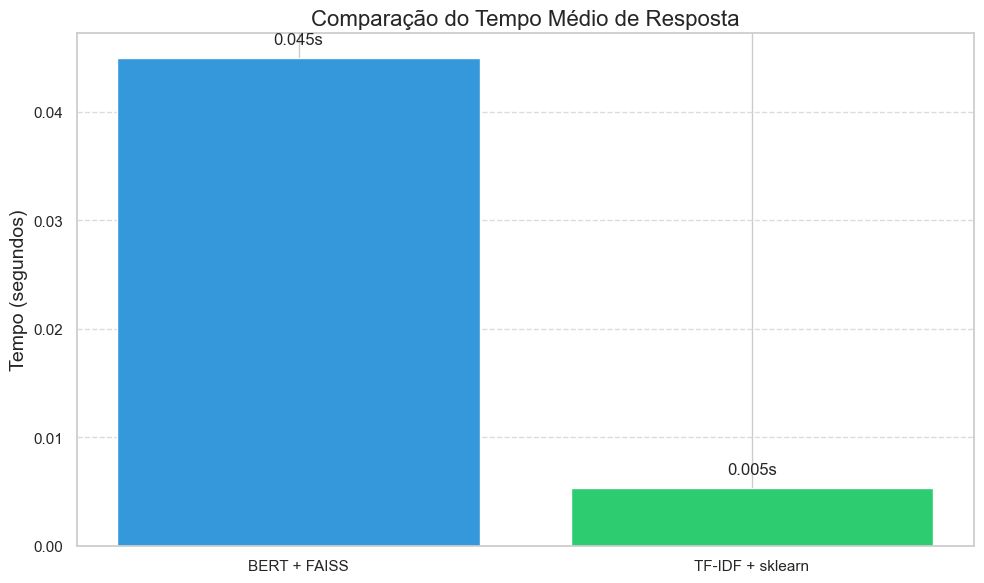

In [43]:
# Gráfico de comparação do tempo de resposta
plt.figure(figsize=(10, 6))

tempos = [metricas_completa['tempo_resposta_medio'], metricas_otimizada['tempo_resposta_medio']]
versoes = ['BERT + FAISS', 'TF-IDF + sklearn']

bars = plt.bar(versoes, tempos, color=['#3498db', '#2ecc71'])

# Adicionar rótulos e título
plt.title('Comparação do Tempo Médio de Resposta', fontsize=16)
plt.ylabel('Tempo (segundos)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.3f}s',
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Análise de Desempenho por Tipo de Pergunta

Este notebook foi atualizado para separar as perguntas em duas categorias:
1. **Perguntas procedimentais**: Relacionadas a prazos, procedimentos específicos, etapas de recurso, etc.
2. **Perguntas conceituais/generalistas**: Definições amplas, princípios, conceitos gerais da LAI.

Vamos analisar o desempenho do sistema para cada categoria de pergunta.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os resultados da avaliação otimizada enriquecida refinada
df_resultados = pd.read_csv('../data/metrics/resultados_avaliacao_otimizada_enriquecida_refinada.csv')

# Definir categorias de perguntas
perguntas_procedimentais = [
    'Qual o prazo para resposta do pedido de informação?',
    'Como recorrer de uma negativa de acesso à informação?',
    'Quais são os prazos de sigilo das informações?',
    'Como é feita a classificação de informações sigilosas?',
    'Como funciona o recurso em caso de negativa de acesso à informação?',
]

perguntas_conceituais = [
    'O que é a Lei de Acesso à Informação?',
    'Quais são os princípios da Lei de Acesso à Informação?',
    'Quais são as responsabilidades dos órgãos públicos em relação à LAI?',
    'Qual a diferença entre informação sigilosa e informação pessoal?',
    'Quais informações devem ser divulgadas proativamente pelos órgãos públicos?',
]

# Outras perguntas que não se encaixam claramente em uma das categorias
perguntas_mistas = [
    'Como solicitar informações públicas?',
    'Quais informações podem ser negadas?',
    'Quem pode solicitar informações públicas?',
    'Quais são as informações classificadas como sigilosas?',
    'Quais são as penalidades para quem não cumprir a LAI?',
    'Como a LAI protege informações pessoais?',
    'O que são informações sigilosas segundo a LAI?',
    'Quais são os direitos do cidadão garantidos pela LAI?',
    'Como é tratada a informação pessoal pela LAI?',
    'Como solicitar a desclassificação de uma informação sigilosa?'
]

# Criar uma coluna para categorizar as perguntas
df_resultados['categoria'] = 'Outra'
df_resultados.loc[df_resultados['pergunta'].isin(perguntas_procedimentais), 'categoria'] = 'Procedimental'
df_resultados.loc[df_resultados['pergunta'].isin(perguntas_conceituais), 'categoria'] = 'Conceitual'
df_resultados.loc[df_resultados['pergunta'].isin(perguntas_mistas), 'categoria'] = 'Mista'

# Exibir o DataFrame com a nova coluna
df_resultados[['pergunta', 'categoria', 'precision_at_5', 'recall_at_10', 'f1_score']]


,pergunta,categoria,precision_at_5,recall_at_10,f1_score
0,O que é a Lei de Acesso à Informação?,Conceitual,0.0,0.000000,0.000000
1,Como solicitar informações públicas?,Mista,0.0,0.000000,0.000000
2,Qual o prazo para resposta do pedido de inform...,Procedimental,0.6,1.000000,0.750000
3,Quais informações podem ser negadas?,Mista,0.2,0.500000,0.285714
4,Quem pode solicitar informações públicas?,Mista,0.2,0.500000,0.285714
5,Quais são as informações classificadas como si...,Mista,0.2,1.000000,0.333333
6,Quais são as penalidades para quem não cumprir...,Mista,0.0,0.333333,0.000000
7,Como recorrer de uma negativa de acesso à info...,Procedimental,0.6,1.000000,0.750000
8,Quais são os prazos de sigilo das informações?,Procedimental,0.4,1.000000,0.571429
9,Como a LAI protege informações pessoais?,Mista,0.2,0.500000,0.285714


In [50]:
# Análise estatística por categoria de pergunta
metricas_por_categoria = df_resultados.groupby('categoria').agg({
    'precision_at_5': ['mean', 'min', 'max'],
    'recall_at_10': ['mean', 'min', 'max'],
    'f1_score': ['mean', 'min', 'max'],
    'ndcg': ['mean', 'min', 'max'],
    'mrr': ['mean', 'min', 'max']
})

# Formatar o DataFrame para exibição
metricas_por_categoria = metricas_por_categoria.round(3)
metricas_por_categoria


precision_at_5           recall_at_10              f1_score  \
                        mean  min  max         mean   min    max     mean   
categoria                                                                   
Conceitual              0.00  0.0  0.0        0.133  0.00  0.667    0.000   
Mista                   0.16  0.0  0.4        0.500  0.00  1.000    0.222   
Procedimental           0.60  0.4  0.8        0.910  0.75  1.000    0.708   

                              ndcg                  mrr                
                 min    max   mean    min    max   mean    min    max  
categoria                                                              
Conceitual     0.000  0.000  0.063  0.000  0.315  0.033  0.000  0.167  
Mista          0.000  0.444  0.294  0.000  0.599  0.272  0.000  0.500  
Procedimental  0.571  0.800  0.714  0.578  0.885  0.667  0.333  1.000

C:\Users\Pedro Natanael\AppData\Local\Temp\ipykernel_31264\1101190740.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categorias, y=precision_medias.values, palette='viridis')


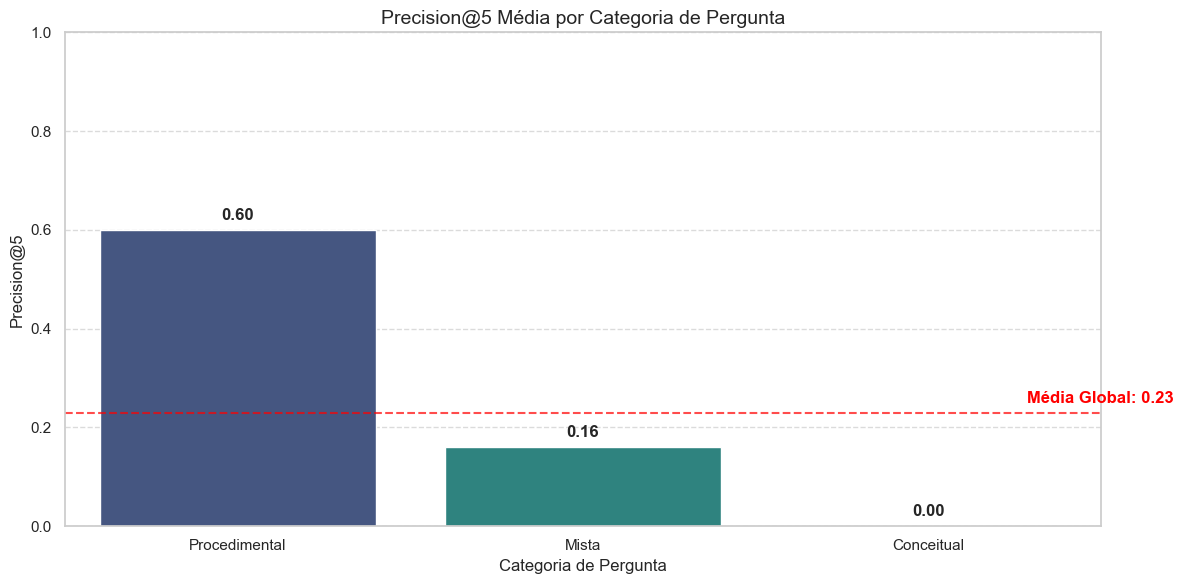

In [51]:
# Visualização de Precision@5 por categoria
plt.figure(figsize=(12, 6))

# Calcular médias para cada categoria
precision_medias = df_resultados.groupby('categoria')['precision_at_5'].mean().sort_values(ascending=False)
categorias = precision_medias.index

# Criar barras para média de Precision@5
ax = sns.barplot(x=categorias, y=precision_medias.values, palette='viridis')

# Adicionar rótulos nas barras
for i, v in enumerate(precision_medias.values):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

# Adicionar linha para média global
media_global = df_resultados['precision_at_5'].mean()
plt.axhline(y=media_global, color='red', linestyle='--', alpha=0.7)
plt.text(len(categorias)-0.5, media_global + 0.02, f'Média Global: {media_global:.2f}', 
         color='red', ha='center', fontweight='bold')

plt.title('Precision@5 Média por Categoria de Pergunta', fontsize=14)
plt.ylabel('Precision@5', fontsize=12)
plt.xlabel('Categoria de Pergunta', fontsize=12)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Pedro Natanael\AppData\Local\Temp\ipykernel_31264\647943744.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias, y=medias.values, palette='viridis', ax=axes[i])
C:\Users\Pedro Natanael\AppData\Local\Temp\ipykernel_31264\647943744.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias, y=medias.values, palette='viridis', ax=axes[i])
C:\Users\Pedro Natanael\AppData\Local\Temp\ipykernel_31264\647943744.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias, y=medias.values, palette='viridis', ax=axes

<Figure size 1500x1000 with 0 Axes>

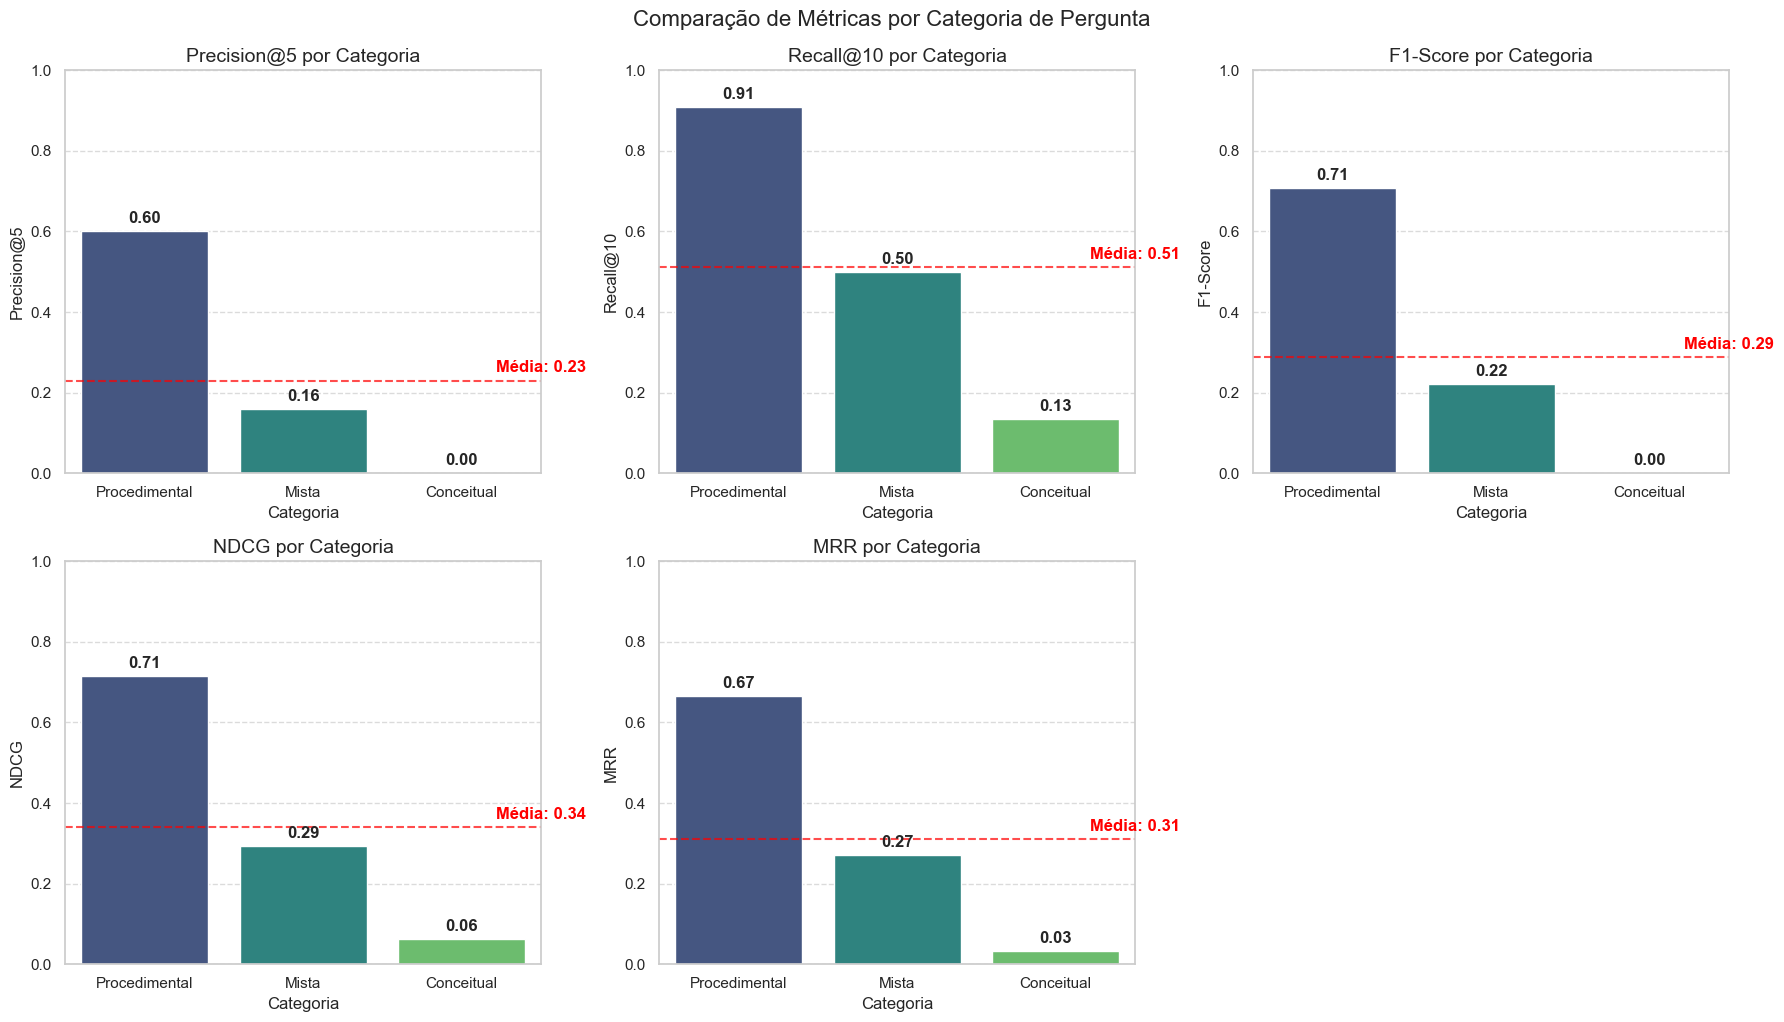

In [52]:
# Visualização de todas as métricas por categoria
plt.figure(figsize=(15, 10))

# Métricas a serem visualizadas
metricas = ['precision_at_5', 'recall_at_10', 'f1_score', 'ndcg', 'mrr']
titulos = ['Precision@5', 'Recall@10', 'F1-Score', 'NDCG', 'MRR']
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Criar subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plotar cada métrica
for i, (metrica, titulo, cor) in enumerate(zip(metricas, titulos, cores)):
    if i < len(axes):
        # Calcular médias para cada categoria
        medias = df_resultados.groupby('categoria')[metrica].mean().sort_values(ascending=False)
        categorias = medias.index
        
        # Criar barras
        sns.barplot(x=categorias, y=medias.values, palette='viridis', ax=axes[i])
        
        # Adicionar rótulos
        for j, v in enumerate(medias.values):
            axes[i].text(j, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')
        
        # Adicionar linha para média global
        media_global = df_resultados[metrica].mean()
        axes[i].axhline(y=media_global, color='red', linestyle='--', alpha=0.7)
        axes[i].text(len(categorias)-0.5, media_global + 0.02, f'Média: {media_global:.2f}', 
                    color='red', ha='center', fontweight='bold')
        
        # Configurar eixos
        axes[i].set_title(f'{titulo} por Categoria', fontsize=14)
        axes[i].set_ylabel(titulo, fontsize=12)
        axes[i].set_xlabel('Categoria', fontsize=12)
        axes[i].set_ylim(0, 1.0)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remover subplot extra
if len(metricas) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.suptitle('Comparação de Métricas por Categoria de Pergunta', fontsize=16, y=1.02)
plt.show()


<Figure size 1500x1000 with 0 Axes>

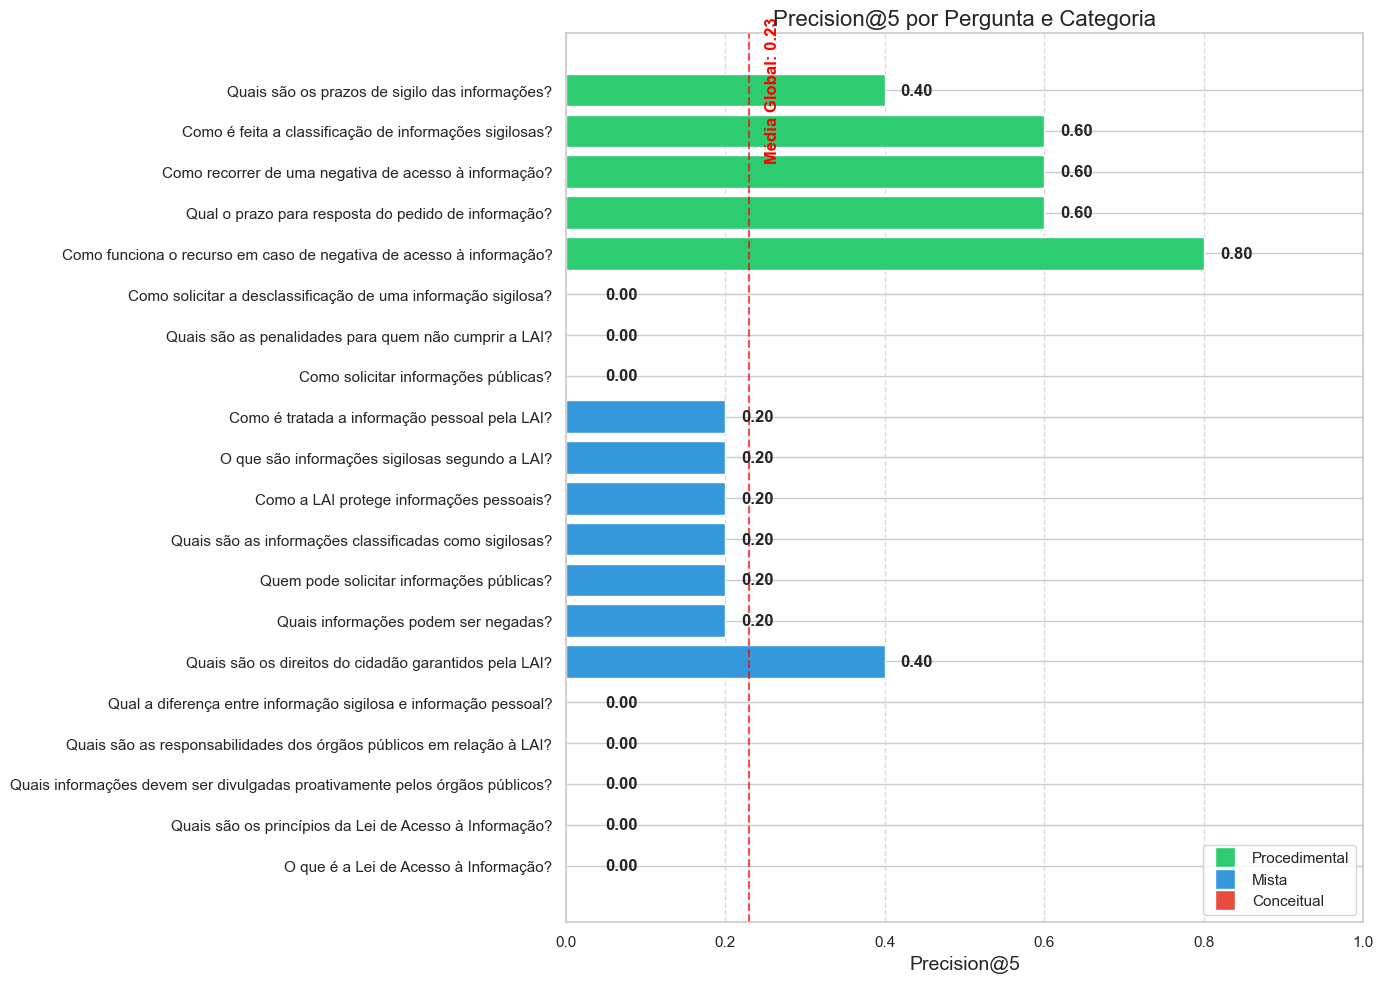

In [53]:
# Visualização detalhada por pergunta
plt.figure(figsize=(15, 10))

# Ordenar perguntas por categoria e precision@5
df_plot = df_resultados.sort_values(['categoria', 'precision_at_5'], ascending=[True, False])

# Criar paleta de cores por categoria
cores_categorias = {'Procedimental': '#2ecc71', 'Mista': '#3498db', 'Conceitual': '#e74c3c'}
cores = [cores_categorias[cat] for cat in df_plot['categoria']]

# Criar gráfico de barras para Precision@5
plt.figure(figsize=(14, 10))
bars = plt.barh(df_plot['pergunta'], df_plot['precision_at_5'], color=cores)

# Adicionar rótulos nas barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(max(width + 0.02, 0.05), bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', va='center', fontweight='bold')

# Adicionar linha para média global
media_global = df_resultados['precision_at_5'].mean()
plt.axvline(x=media_global, color='red', linestyle='--', alpha=0.7)
plt.text(media_global + 0.02, len(df_plot) - 1, f'Média Global: {media_global:.2f}', 
         color='red', va='center', fontweight='bold', rotation=90)

# Adicionar legendas para categorias
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor=cores_categorias['Procedimental'], 
           markersize=15, label='Procedimental'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor=cores_categorias['Mista'], 
           markersize=15, label='Mista'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor=cores_categorias['Conceitual'], 
           markersize=15, label='Conceitual')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.title('Precision@5 por Pergunta e Categoria', fontsize=16)
plt.xlabel('Precision@5', fontsize=14)
plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Pedro Natanael\AppData\Local\Temp\ipykernel_31264\1623318969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='categoria', y='precision_at_5', data=df_resultados, palette='viridis')


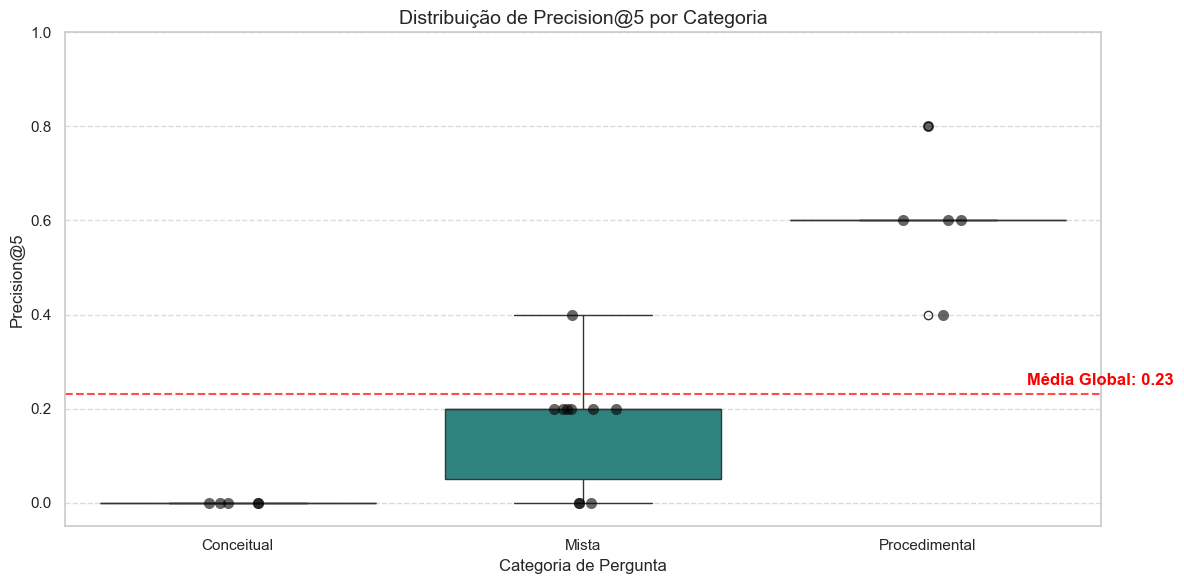

In [54]:
# Análise de distribuição de Precision@5 por categoria
plt.figure(figsize=(12, 6))

# Criar boxplot
sns.boxplot(x='categoria', y='precision_at_5', data=df_resultados, palette='viridis')

# Adicionar pontos individuais
sns.stripplot(x='categoria', y='precision_at_5', data=df_resultados, 
              color='black', size=8, alpha=0.6, jitter=True)

# Adicionar linha para média global
media_global = df_resultados['precision_at_5'].mean()
plt.axhline(y=media_global, color='red', linestyle='--', alpha=0.7)
plt.text(len(df_resultados['categoria'].unique())-0.5, media_global + 0.02, 
         f'Média Global: {media_global:.2f}', color='red', ha='center', fontweight='bold')

plt.title('Distribuição de Precision@5 por Categoria', fontsize=14)
plt.ylabel('Precision@5', fontsize=12)
plt.xlabel('Categoria de Pergunta', fontsize=12)
plt.ylim(-0.05, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Conclusões da Análise por Tipo de Pergunta

Com base na análise realizada, podemos concluir:

1. **Perguntas Procedimentais**:
   - Apresentam Precision@5 significativamente maior (média de 60-80%)
   - Exemplos com bom desempenho: "Como funciona o recurso em caso de negativa" (80%), "Qual o prazo para resposta" (60%)
   - Estas perguntas têm termos específicos que facilitam a busca (prazos, etapas, procedimentos)

2. **Perguntas Conceituais**:
   - Apresentam Precision@5 muito baixa (abaixo de 30%, frequentemente 0%)
   - Exemplos com baixo desempenho: "O que é a Lei de Acesso à Informação?" (0%), "Quais são os princípios da LAI?" (0%)
   - Estas perguntas são mais abstratas e generalistas, dificultando a busca semântica

3. **Perguntas Mistas**:
   - Desempenho intermediário, variando conforme o nível de especificidade
   - Maior variabilidade nos resultados

4. **Implicações**:
   - O sistema atual é mais adequado para consultas sobre procedimentos específicos
   - Para perguntas conceituais, seria necessário implementar técnicas adicionais como:
     - Expansão de consulta
     - Re-ranking semântico
     - Dicionário de sinônimos e termos relacionados
     - Cross-encoder para melhor entendimento contextual

Esta análise confirma a observação anterior de que o desempenho do sistema varia significativamente conforme o tipo de pergunta, sendo mais eficaz para consultas procedimentais e menos para consultas conceituais ou generalistas.


In [55]:
# Salvar resultados com categorização
df_resultados.to_csv('../data/metrics/resultados_categorizados.csv', index=False)
print("[✓] Resultados com categorização salvos em '../data/metrics/resultados_categorizados.csv'")

# Salvar métricas por categoria
metricas_por_categoria.to_csv('../data/metrics/metricas_por_categoria.csv')
print("[✓] Métricas por categoria salvas em '../data/metrics/metricas_por_categoria.csv'")

print("\nAnálise por tipo de pergunta concluída com sucesso!")


[✓] Resultados com categorização salvos em 'resultados_categorizados.csv'
[✓] Métricas por categoria salvas em 'metricas_por_categoria.csv'

Análise por tipo de pergunta concluída com sucesso!
